# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 1. Метрики и меры схожести.**

### *Краткое описание*

В практической работе 1 вы познакомитесь с евклидовой метрикой и DTW мерой. Реализуете иерархическую кластеризацию временных рядов, которая использует различные метрики/меры схожести, и сравните точность кластеризации. Также исследуете важность преобразования временных рядов в z-нормализованные на этапе подготовки данных. Попробуете ускорить вычисление DTW меры с помощью одной из известных оптимизаций, заключающейся в ограничении полосы Сако—Чиба. Выполните классификацию временных рядов алгоритмом k-ближайших соседей (kNN). Исследуете влияние ширины полосы Сако—Чиба на точность и время выполнения алгоритма kNN.

### *Структура и оценивание*

Практическая работа 1 состоит из трех частей, расположенных в порядке усложнения заданий, которые необходимо реализовать в каждой части практической работы. С соответствии с этим каждая часть оценивается определенным количеством баллов (указана в скобках). Максимально допустимая оценка за работу — XX баллов.

Обратите внимание, что в каждом части практической работы есть задания, которые необходимо реализовать, и есть вопросы, на которые необходимо дать ответ. Вопросы дополняют задания и направлены на то, чтобы дать объяснение обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов будут снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы выставлены не будут.


### *Сроки выполнения*
Практическую работу можно сдаваться по частям, по мере их готовности. Каждую часть необходимо сдать не позднее следующих сроков:
- 1 Часть – XX.YY.20ZZ ;
- 2 Часть – XX.YY.20ZZ ;
- 3 Часть – XX.YY.20ZZ .

В случае, если части практической работы сдаются не в указанные сроки, то  баллы будут снижены на XX баллов.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/TimeSeriesCourse/practice/00 Intro/solution')

In [ ]:
%load_ext autoreload
%autoreload 2

## **Часть 1 (XX баллов)** Евклидова метрика и DTW мера. Матрица расстояний. Иерархическая кластеризация.

Импорт библиотек и модулей

In [ ]:
import numpy as np
import pandas as pd

from modules.metrics import *
from modules.utils import *
from modules.plots import *

### **Задание 1.**
Вам необходимо самостоятельно реализовать функцию `ED_distance()` в модуле *metrics.py* для нахождения евклидовой метрики между временными рядами, имеющими одинаковую длину, и проверить ее реализацию с помощью функции `euclidean_distance()` из библиотеки *sktime*. В качестве входных данных используйте два синтетических временных ряда некоторой заданной вами длины, сгенерированных моделью случайных блужданий (Random Walk). Модель случайных блужданий реализуйте самостоятельно или используйте готовые реализации.

*Евклидова метрика* между временными рядами $T_1$ и $T_2$ длины $n$ вычисляется следующим образом:

\begin{equation}
    \text{ED}(T_1, T_2) = \sqrt{\sum_{i=1}^{n} ({t_{1}}_i-{t_{2}}_i)^2}.
\end{equation}

In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 15.0 MB/s eta 0:00:00


In [ ]:
from sktime.distances import euclidean_distance
import random

def test_ed_distance(ts1, ts2):

    sktime_ed_dist = round(euclidean_distance(ts1, ts2), 5)
    desired_ed_dist = round(ED_distance(ts1, ts2), 5)

    np.testing.assert_equal(sktime_ed_dist, desired_ed_dist, 'ED distances are not equal')

ts_len = 10
ts1 = np.array([round(random.uniform(0, 10), 2) for i in range(ts_len)])
ts2 = np.array([round(random.uniform(0, 10), 2) for i in range(ts_len)])

test_ed_distance(ts1, ts2)

### **Задание 2.**

Вам необходимо самостоятельно реализовать функцию `DTW_distance()` в модуле *metrics.py* для нахождения DTW меры между временными рядами, имеющими одинаковую длину, и проверить ее реализацию с помощью функции `dtw_distance()` из библиотеки *sktime*. Сгенерируйте два временных ряда некоторой заданной вами длины с помощью модели случайных блужданий (Random Walk) или используйте ряды из предыдущего задания.

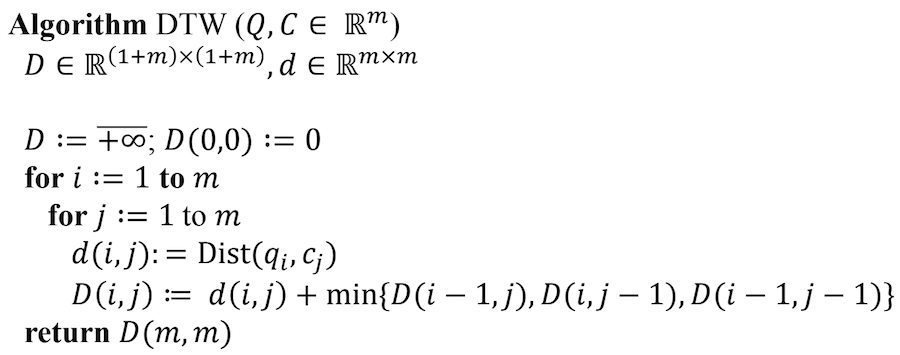

In [ ]:
import random
from sktime.distances import dtw_distance

def test_dtw_distance(ts1, ts2):

    sktime_dtw_dist = dtw_distance(ts1, ts2)
    desired_dtw_dist = DTW_distance(ts1, ts2)

    np.testing.assert_equal(sktime_dtw_dist, desired_dtw_dist, 'DTW distances are not equal')

ts_len = 128
ts1 = np.array([round(random.uniform(0, 30), 3) for i in range(ts_len)])
ts2 = np.array([round(random.uniform(0, 20), 3) for i in range(ts_len)])

test_dtw_distance(ts1, ts2)

### **Задание 3.**
Реализуйте функцию нахождения матрицы расстояния между временными рядами. Для вычисления расстояний между рядами используйте функции `ED_distance()` и `DTW_distance()` из модуля *metrics.py*.

Поскольку евклидова метрика и DTW мера удовлетворяют аксиоме симметричности (т.е. $dist(A,B)=dist(B,A)$), то матрица расстояний будет квадратной и симметричной относительно главной диагонали. Для ускорения вычислений достаточно найти ее верхний треугольник, а нижний треугольник матрицы заполнить значениями верхнего треугольника следующим образом: $dist\_matrix(j,i) = dist\_matrix(i,j)$, где $i < j$.

In [ ]:
def calculate_distance_matrix(data, metric='euclidean', normalize=True):

    N = data.shape[0] # number of time series

    # Initialize the distance matrix
    distance_matrix = np.zeros(shape=(N, N))

    # Build the distance matrix
    for i in range(N):
        for j in range(i+1, N, 1):
            s1 = data[i]
            s2 = data[j]

            if (metric == 'euclidean'):
                if (normalize):
                    dist = norm_ED_distance(s1, s2)
                else:
                    dist = ED_distance(s1, s2)
            else:
                if (metric == 'dtw'):
                    if (normalize):
                        s1 = z_normalize(s1)
                        s2 = z_normalize(s2)
                    dist = DTW_distance(s1, s2)
                else:
                    raise ValueError('The distance metric is not defined')

            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist

    return distance_matrix

### **Задание 4.**
Далее рассмотрим задачу иерархической кластеризации временных рядов, где будет использоваться вычисленная матрица расстояний.

Для этого сначала загрузите набор временных рядов CBF из файла CBF_TRAIN.txt. Каждая строка данного файла содержит целевую переменную (класс: 0, 1 или 2), которая записана в первом столбце, и временной ряд -- в остальных столбцах. Набор CBF является синтетическим и включает в себя 30 временных рядов,  каждый из которых принадлежит к одному из трех классов.

In [ ]:
def load_ts(file_name):

    ts = pd.read_csv(file_name, header=None, delim_whitespace=True)

    return ts

In [ ]:
url = '../datasets/part1/CBF_TRAIN.txt'

data = load_ts(url)

ts_set = data.iloc[:, 1:].to_numpy()
labels = data.iloc[:, 0].squeeze().to_numpy()

Выполните визуализацию экземпляра каждого класса. Для этого используйте функцию `plot_ts_set()` из модуля *plots.py*.

In [ ]:
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
m = ts_set.shape[1]

each_label_ts = np.empty((num_labels, m))

for i in range(num_labels):
    ts_idx = np.where(labels == unique_labels[i])[0][0]
    each_label_ts[i] = np.take(ts_set, ts_idx, axis=0)

plot_ts_set(each_label_ts, title = 'Time series of each label')

Далее вам необходимо самостоятельно реализовать класс для выполнения иерархической кластеризации временных рядов.

Перед тем как приступить к его реализации, изучите скелет класса `TimeSeriesHierarchicalClustering`, который представлен в модуле *clustering.py*. Реализуйте метод `fit()`, выполняющий кластеризацию данных на основе предвычисленной матрицы расстояний, которая передается в данный метод.   

Далее найдите матрицу расстояний между временными рядами для евлидовой метрики и DTW меры. Протестируйте свою реализацию иерархической кластеризации на наборе данных CBF. Для визуализации результатов постройте дендрограмму с помощью метода `plot_dendrogram()`, передав исходный набор временных рядов и их метки.

In [ ]:
from modules.clustering import *

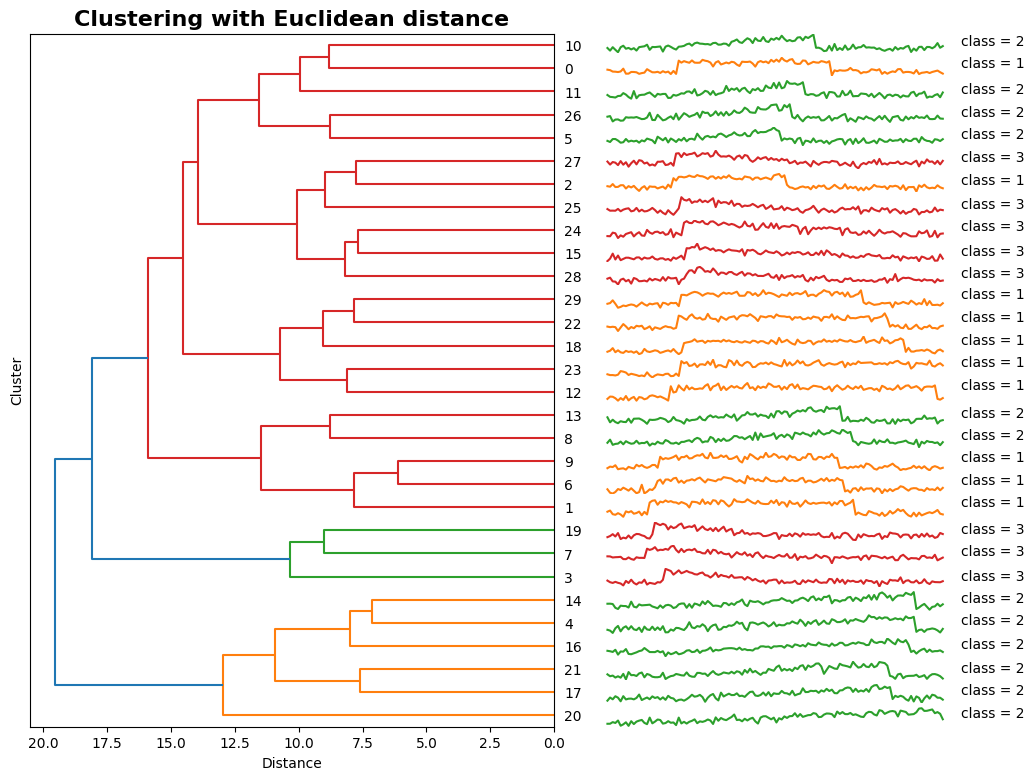

In [ ]:
ed_distance_matrix = calculate_distance_matrix(ts_set, metric='euclidean', normalize=False)

ed_model = TimeSeriesHierarchicalClustering(n_clusters=3, method='complete')
ed_model.fit(ed_distance_matrix)
ed_model.plot_dendrogram(ts_set, labels, title = 'Clustering with Euclidean distance')

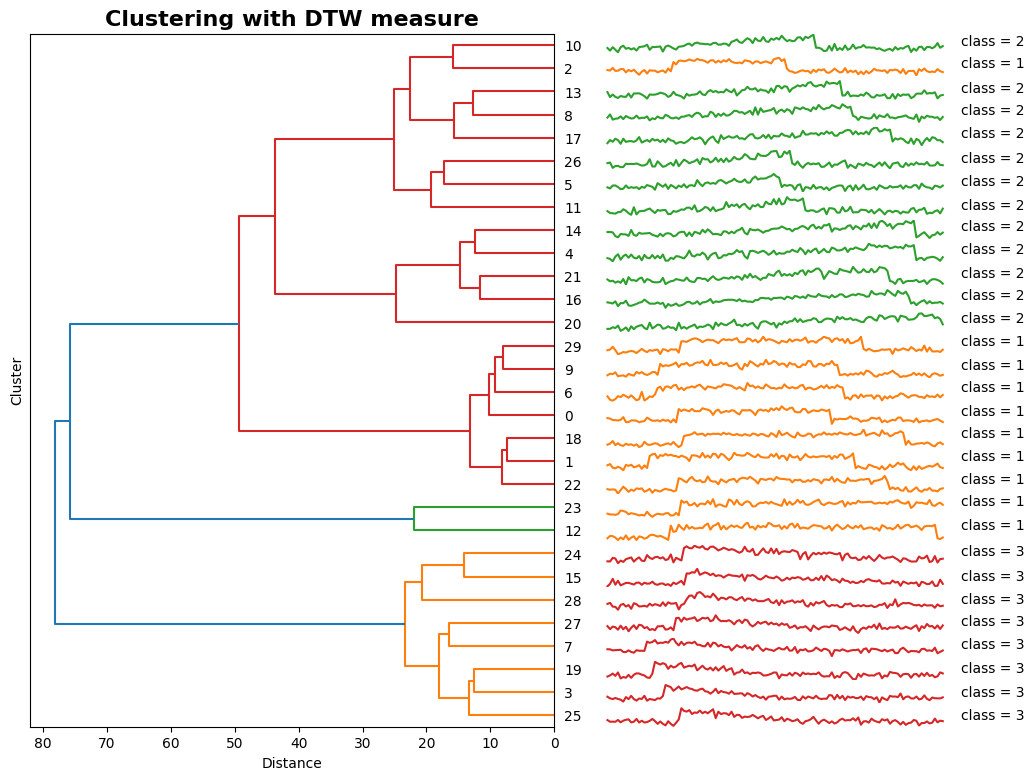

In [ ]:
dtw_distance_matrix = calculate_distance_matrix(ts_set, metric='dtw', normalize=False)

dtw_model = TimeSeriesHierarchicalClustering(n_clusters=3, method='complete')
dtw_model.fit(dtw_distance_matrix)
dtw_model.plot_dendrogram(ts_set, labels, title = 'Clustering with DTW measure')

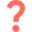
Проанализируйте полученные результаты кластеризации с помощью построенных дендрограмм. Какая на ваш взгляд метрика/мера показала лучший результат и почему? Укажите, в каких случаях более предпочтительно использовать меру DTW, чем метрику Евклида.

*Вывод*

## **Часть 2 (XX баллов)** Z-нормализация временных рядов.

### **Задание 5.**
Реализуйте функцию вычисления нормализованного евклидова расстояния между временными рядами `norm_ED_distance()` в модуле *metrics.py* и проверьте правильность своей реализации с помощью функции `ed_distance()` из библиотеки *sktime*, в которую необходимо передать нормализованные временные ряды. Для  нормализации временных рядов используйте функцию `z-normalize()` из *utils.py*.  Для проверки можно использовать синтетические временные ряды из первой части или заново их сгенерировать моделью Random Walk.

*Нормализованная евклидова метрика* между временными рядами $T_1$ и $T_2$ длины $n$ вычисляется следующим образом:

\begin{equation}
	\text{ED_norm}(T_1, T_2) = \sqrt {2m\left(1-\dfrac{<T_1, T_2> - \; m \; \cdotp \mu_{T_1} \; \cdotp \mu_{T_2}}{m \; \cdotp \sigma_{T_1} \; \cdotp \sigma_{T_2}}\right)},
\end{equation}

где $<T_1, T_2>$ -- скалярное произведение временных рядов, $\mu_{T_1}$ и $\mu_{T_2}$, $\sigma_{T_1}$ и $\sigma_{T_2}$ -- среднее арифметическое и стандартное отклонение временных рядов соответственно.

В свою очередь, *среднее арифметическое* $\mu_T$ и *стандартное отклонение* $\sigma_T$ временного ряда $T$ длины $n$ вычисляются по следующим формулам:

\begin{equation}
	\mu_{T} = \frac{1}{n}\sum\limits_{i=1}^{n} t_{i}, \\[1em]
	\sigma^2_{T} = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n} t_i^2-\mu_{T}^2}.
\end{equation}

In [ ]:
def test_norm_ed_distance(ts1, ts2):

    sktime_ed_dist = round(euclidean_distance(z_normalize(ts1), z_normalize(ts2)), 5)
    desired_ed_dist = round(norm_ED_distance(ts1, ts2), 5)

    np.testing.assert_equal(sktime_ed_dist, desired_ed_dist, 'Normalized ED distances are not equal')

ts_len = 10
ts1 = np.array([round(random.uniform(0, 10), 2) for i in range(ts_len)])
ts2 = np.array([round(random.uniform(0, 10), 2) for i in range(ts_len)])

test_norm_ed_distance(ts1, ts2)

### **Задание 6.**
Далее убедимся, что выполнение z-нормализации на этапе предобработки данных имеет важное значение и может повысить точность решаемой задачи.

В данном задании вы продолжите решать задачу иерархической кластеризации. В качестве данных будут использоваться два временных ряда из набора данных BIDMC. Набор BIDMC состоит из записей ЭКГ-сигналов, снятых с 15 пациентов с сердечной недостаточностью тяжелой степени.  

Загрузите два временных ряда и визуализируйте их с помощью функции `plot_ts_set()` из модуля *plots.py*.

In [ ]:
url1 = '../datasets/part2/chf10.csv'
ts1 = load_ts(url1)

url2 = '../datasets/part2/chf11.csv'
ts2 = load_ts(url2)

In [ ]:
ts_set = np.concatenate((ts1, ts2), axis=1).T

In [ ]:
plot_ts_set(ts_set)

Разделите каждый временной ряд на непересекающиеся подпоследовательности с помощью техники скользящего окна. Для этого используйте функцию `sliding_window()` из модуля *utils.py*, передав в нее временной ряд и заданную длину подпоследовательности.

In [ ]:
m = 125
subs_set1 = sliding_window(ts_set[0], m, m-1)
subs_set2 = sliding_window(ts_set[1], m, m-1)

Сформируйте множество всех подпоследовательностей, извлеченных из двух временных рядов, и массив меток подпоследовательностей в соответствии с их принадлежностью к временному ряду.

In [ ]:
subs_set = np.concatenate((subs_set1[0:15], subs_set2[0:15]))
labels = np.array([0]*subs_set1[0:15].shape[0] + [1]*subs_set2[0:15].shape[0])

Добавьте в метод `fit()` класса `Time_Series_Hierarchical_Clustering` вызов функции `norm_ED_distance()`, чтобы была возможность кластеризовать временные ряды на основе нормализованной евклидовой метрики.

Далее выполните иерархическую кластеризацию подпоследовательностей двух временных рядов с использованием классической и нормализованной евклидовой метрики.

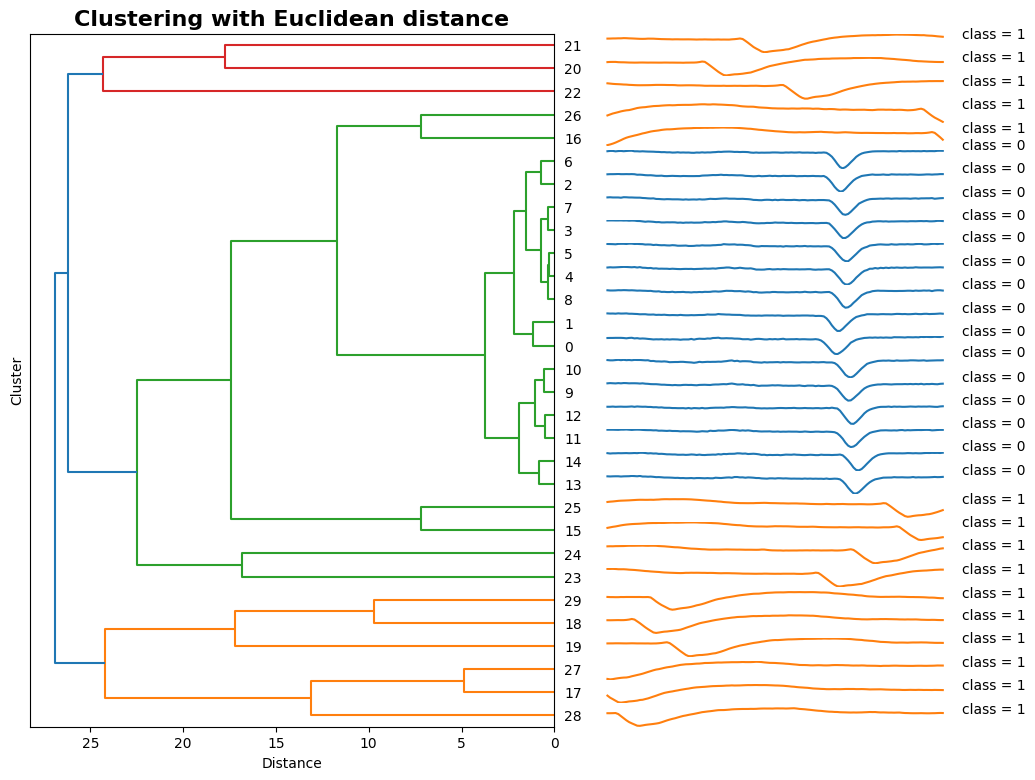

In [ ]:
ed_distance_matrix = calculate_distance_matrix(subs_set, metric='euclidean', normalize=False)

ed_model = TimeSeriesHierarchicalClustering(n_clusters=2, method='complete')
ed_model.fit(ed_distance_matrix)
ed_model.plot_dendrogram(subs_set, labels, title = 'Clustering with Euclidean distance')

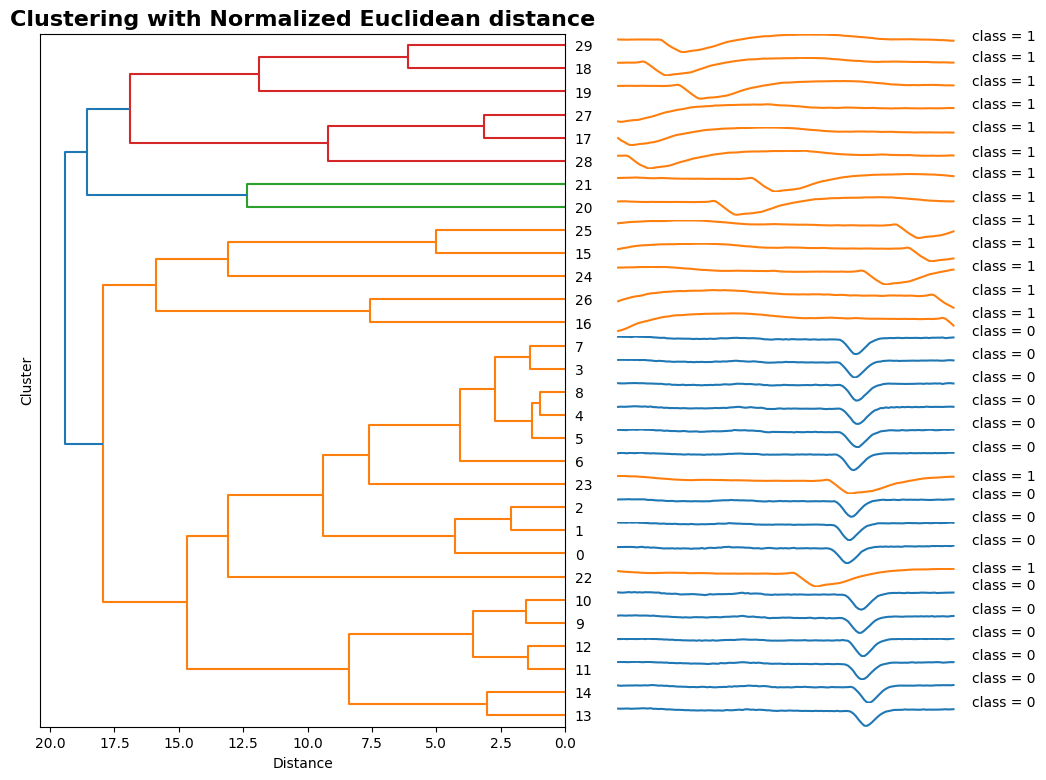

In [ ]:
norm_ed_distance_matrix = calculate_distance_matrix(subs_set, metric='euclidean', normalize=True)

norm_ed_model = TimeSeriesHierarchicalClustering(n_clusters=2, method='complete')
norm_ed_model.fit(norm_ed_distance_matrix)
norm_ed_model.plot_dendrogram(subs_set, labels, title = 'Clustering with Normalized Euclidean distance')

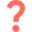
Сравните полученные результаты кластеризации с помощью построенных дендрограм. Улучшилось ли качество кластеризации, когда временные ряды предварительно подтвергаются z-нормализации?

*Вывод*

## **Часть 3 (XX баллов)** Ускорение вычисления DTW меры техникой ограничения полосы Сако—Чиба. Классификация временных рядов.

### **Задание 7.**
Для ускорения вычисления DTW меры добавьте в функцию `DTW_distance()` возможность ограничения полосы Сако—Чиба, чтобы путь трансформации не отклонялся более чем на $r$ ячеек от диагонали матрицы трансформации. Протестируйте вашу реализацию с помощью функции `dtw_distance()` из библиотеки *sktime* для различных значений параметра $r$.

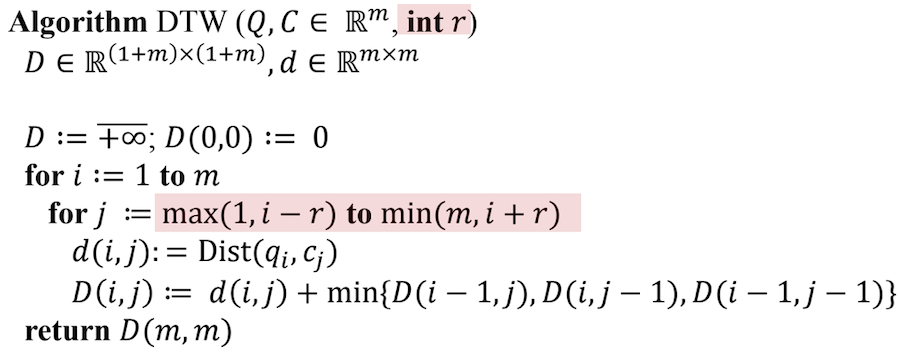

In [ ]:
def test_Sako_Chiba_DTW_distance(subs1, subs2, r=0.05):

    sktime_dtw_dist = dtw_distance(subs1, subs2, window=r)
    desired_dtw_distance = DTW_distance(subs1, subs2, r)

    np.testing.assert_equal(sktime_dtw_dist, desired_dtw_distance, f'DTW distances are not equal with r = {r}')


subs_len = 512
subs1 = np.array([round(random.uniform(0, 30), 2) for i in range(subs_len)])
subs2 = np.array([round(random.uniform(0, 20), 2) for i in range(subs_len)])

for r in np.arange(0, 1, 0.05):
    test_Sako_Chiba_DTW_distance(subs1, subs2, r)

### **Задание 8.**
Вам необходимо исследовать влияние ширины полосы Сако—Чиба на точность и время работы алгоритма на примере задачи классификации временных рядов. Классификация будет выполняться с помощью алгоритма k-ближайших соседей (kNN). Шаблон класса `TimeSeriesKNN` содержится в модуле *classification.py*, методы которого вам необходимо дописать.

*Метод $k$ ближайших соседей (kNN)* – алгоритм классификации, заключающийся в вычислении сходства между объектами на основе некоторой заданной метрики/меры схожести. Классифицируемый объект относится к тому классу, к которому принадлежит большинство из его $k$ соседей ($k$ ближайших к нему объектов из обучающей выборки).

Для классификации на основе алгоритма kNN необходимо выполнить следующие шаги:

1. Загрузить обучающую и тестовую выборки.

2. Задать параметр алгоритма $k$, где $k$ – количество ближайших соседей, $k \in \mathbb N^*$.

3. Для каждого объекта из тестовой выборки выполнить следующее:

    3.1. Вычислить расстояние до всех объектов из обучающей выборки на основе заданной метрики/меры схожести.

    3.2. Отсортировать в порядке возрастания найденные расстояния.

    3.3. Найти $k$ ближайших соседей, взяв первые $k$ минимальные расстояния из отсортированного массива расстояний.

    3.4. Назначить объекту из тестовой выборки наиболее часто встречающийся класс найденных ранее ближайших соседей.

Загрузите обучающую и тестовую выборки синтетического набора данных CBF, с которым вы уже познакомились при выполнении первой части практической работы. Далее разделите каждую выборку на метки и временные ряды. В первом столбце записаны метки, в остальных – временные ряды.   

In [ ]:
train_url = '../datasets/part3/CBF_TRAIN.txt'
test_url = '../datasets/part3/CBF_TEST.txt'

train_data = load_ts(train_url)
test_data = load_ts(test_url)

train_set, train_labels = train_data.iloc[:, 1:], train_data.iloc[:, 0].astype('int32')
test_set, test_labels = test_data.iloc[:, 1:], test_data.iloc[:, 0].astype('int32')

In [ ]:
import time

from modules.classification import *

Реализуйте метод `fit()` в классе `TimeSeriesKNN`, который выполняет поиск для каждого элемента из тестовой выборки $k$ ближайших соседей и назначает им тот класс, который является часто встречающимся среди классов ближайших соседей. В качестве параметров в метод `fit()` передается тестовая выборка. Вычислите точность классификации по метрике accuracy с помощью функции `calculate_accurary()` из модуля *classification.py*.

In [ ]:
n_neighbors = 5
metric = 'dtw'
r = 0.05
metric_params = {'normalize': True, 'r': r}

KNN_classifier = TimeSeriesKNN(n_neighbors, metric, metric_params)
KNN_classifier.fit(train_set, train_labels)

y_pred = KNN_classifier.predict(test_set.iloc[0:10])

accuracy = calculate_accuracy(test_labels.iloc[0:10], y_pred)

print(f'Точность классификации составила {accuracy}.')

Точность классификации составила 1.0.


### **Задание 9.**
Проведите две серии экспериментов. В первой серии экспериментов исследуйте влияния ширины полосы Сако—Чиба на точность классификации. Во второй серии экспериментов необходимо исследовать влияния ширины полосы Сако—Чиба на время выполнения алгоритма kNN. При этом количество ближайших соседей должно быть зафиксировано.

In [ ]:
accuracy_list = []
times = []

r_list = np.arange(0, 0.9, 0.05)

n_neighbors = 5
metric = 'dtw'

for r in r_list:

    metric_params = {'normalize': True, 'r': r}

    KNN_classifier = TimeSeriesKNN(n_neighbors, metric, metric_params)
    KNN_classifier.fit(train_set, train_labels)

    start = time.time()
    y_pred = KNN_classifier.predict(test_set.iloc[0:10])
    end = time.time()

    accuracy = calculate_accuracy(test_labels.iloc[0:10], y_pred)
    accuracy_list.append(accuracy)
    times.append(end - start)

Постройте график зависимости точности классификации временных рядов от ширины полосы Сако—Чиба.



In [ ]:
x_title = 'Warping Window Size, r'
y_title = 'Accuracy'
plot_title = 'Classification accuracy depending on <br> the warping window size'

plot2d(r_list, accuracy_list, plot_title, x_title, y_title)

Постройте график зависимости времени выполнения алгоритма kNN от ширины полосы Сако—Чиба.

In [ ]:
x_title = 'Warping Window Size, r'
y_title = 'Runtime, s'
plot_title = 'Runtime depending on the warping window size'

plot2d(r_list, times, plot_title, x_title, y_title)

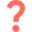
Проанализируйте графики и сделайте выводы.

*Вывод*